<a href="https://colab.research.google.com/github/parampreetchahal/pest-detection-yollo11/blob/main/Pest_Detection_yollo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q /content/PestData.zip -d /content/cust_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/cust_data" --train_pct=0.9

--2025-03-01 10:36:25--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-03-01 10:36:25 (61.3 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 614
Number of annotation files: 614
Images moving to train: 552
Images moving to validation: 62


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 47.6 MB/s eta 0:00:00


In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content//cust_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 8
names:
- bees
- beetle
- catterpillar
- earthworms
- earwig
- moth
- slug
- weevil


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=89 imgsz=640

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=89, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

In [ ]:
!yolo detect predict model=/content/runs/detect/train2/weights/best.pt source=/content/data/validation/images save=True

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/62 /content/data/validation/images/01629ab5-moth_87.jpg: 416x640 1 catterpillar, 1 moth, 49.9ms
image 2/62 /content/data/validation/images/05ff7bf3-slug_65.jpg: 480x640 2 slugs, 46.3ms
image 3/62 /content/data/validation/images/0bb84917-bees_223.jpg: 576x640 1 bees, 45.1ms
image 4/62 /content/data/validation/images/145af23d-moth_477.jpg: 352x640 1 moth, 51.5ms
image 5/62 /content/data/validation/images/18daa602-earthworms_322.jpg: 448x640 1 beetle, 1 earthworms, 45.1ms
image 6/62 /content/data/validation/images/199da816-moth_124.jpg: 480x640 1 moth, 13.1ms
image 7/62 /content/data/validation/images/19f5e6d4-moth_99.jpg: 576x640 1 moth, 15.7ms
image 8/62 /content/data/validation/images/1d343af2-earwig_250.jpg: 448x640 1 earwig, 12.7ms
image 9/62 /content/data/validation/images/22e8d418-moth_95.jpg: 480x640 1 moth, 

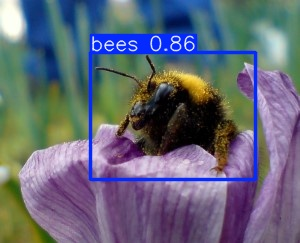

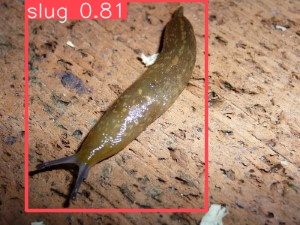

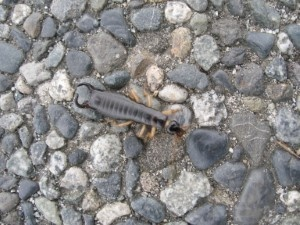

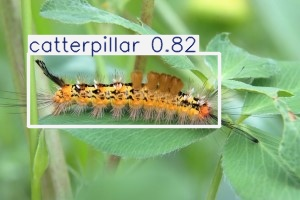

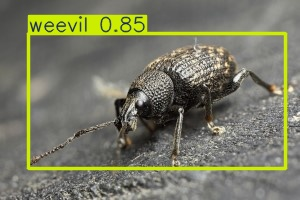

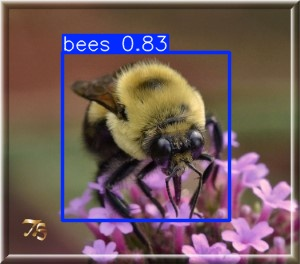

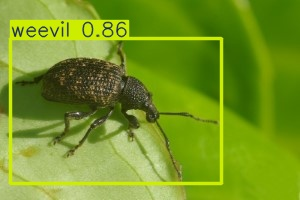

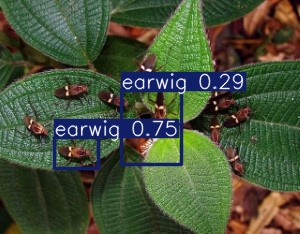

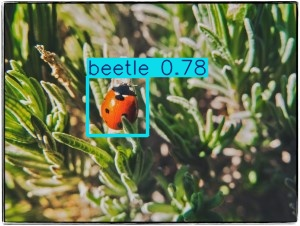

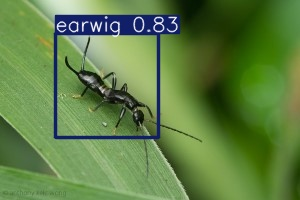

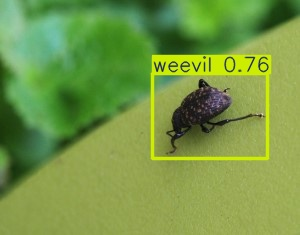

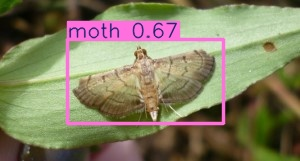

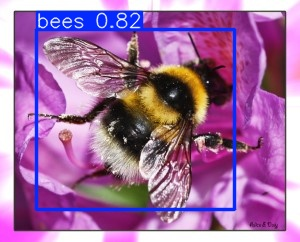

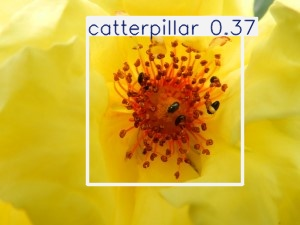

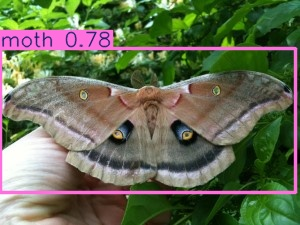

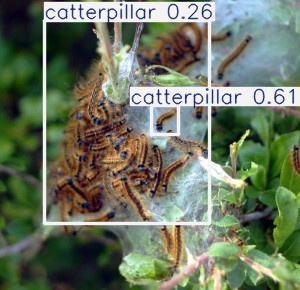

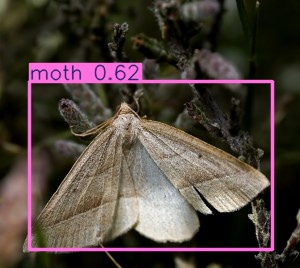

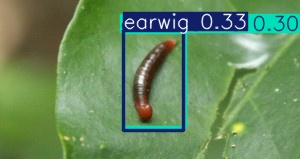

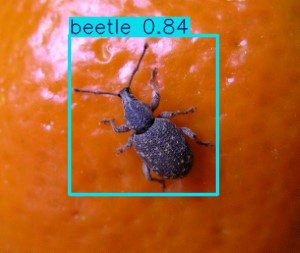

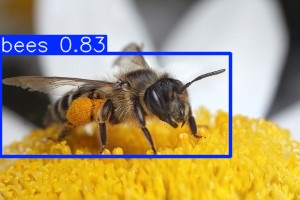

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:20]:
  display(Image(filename=image_path, height=400))
  print('\n')


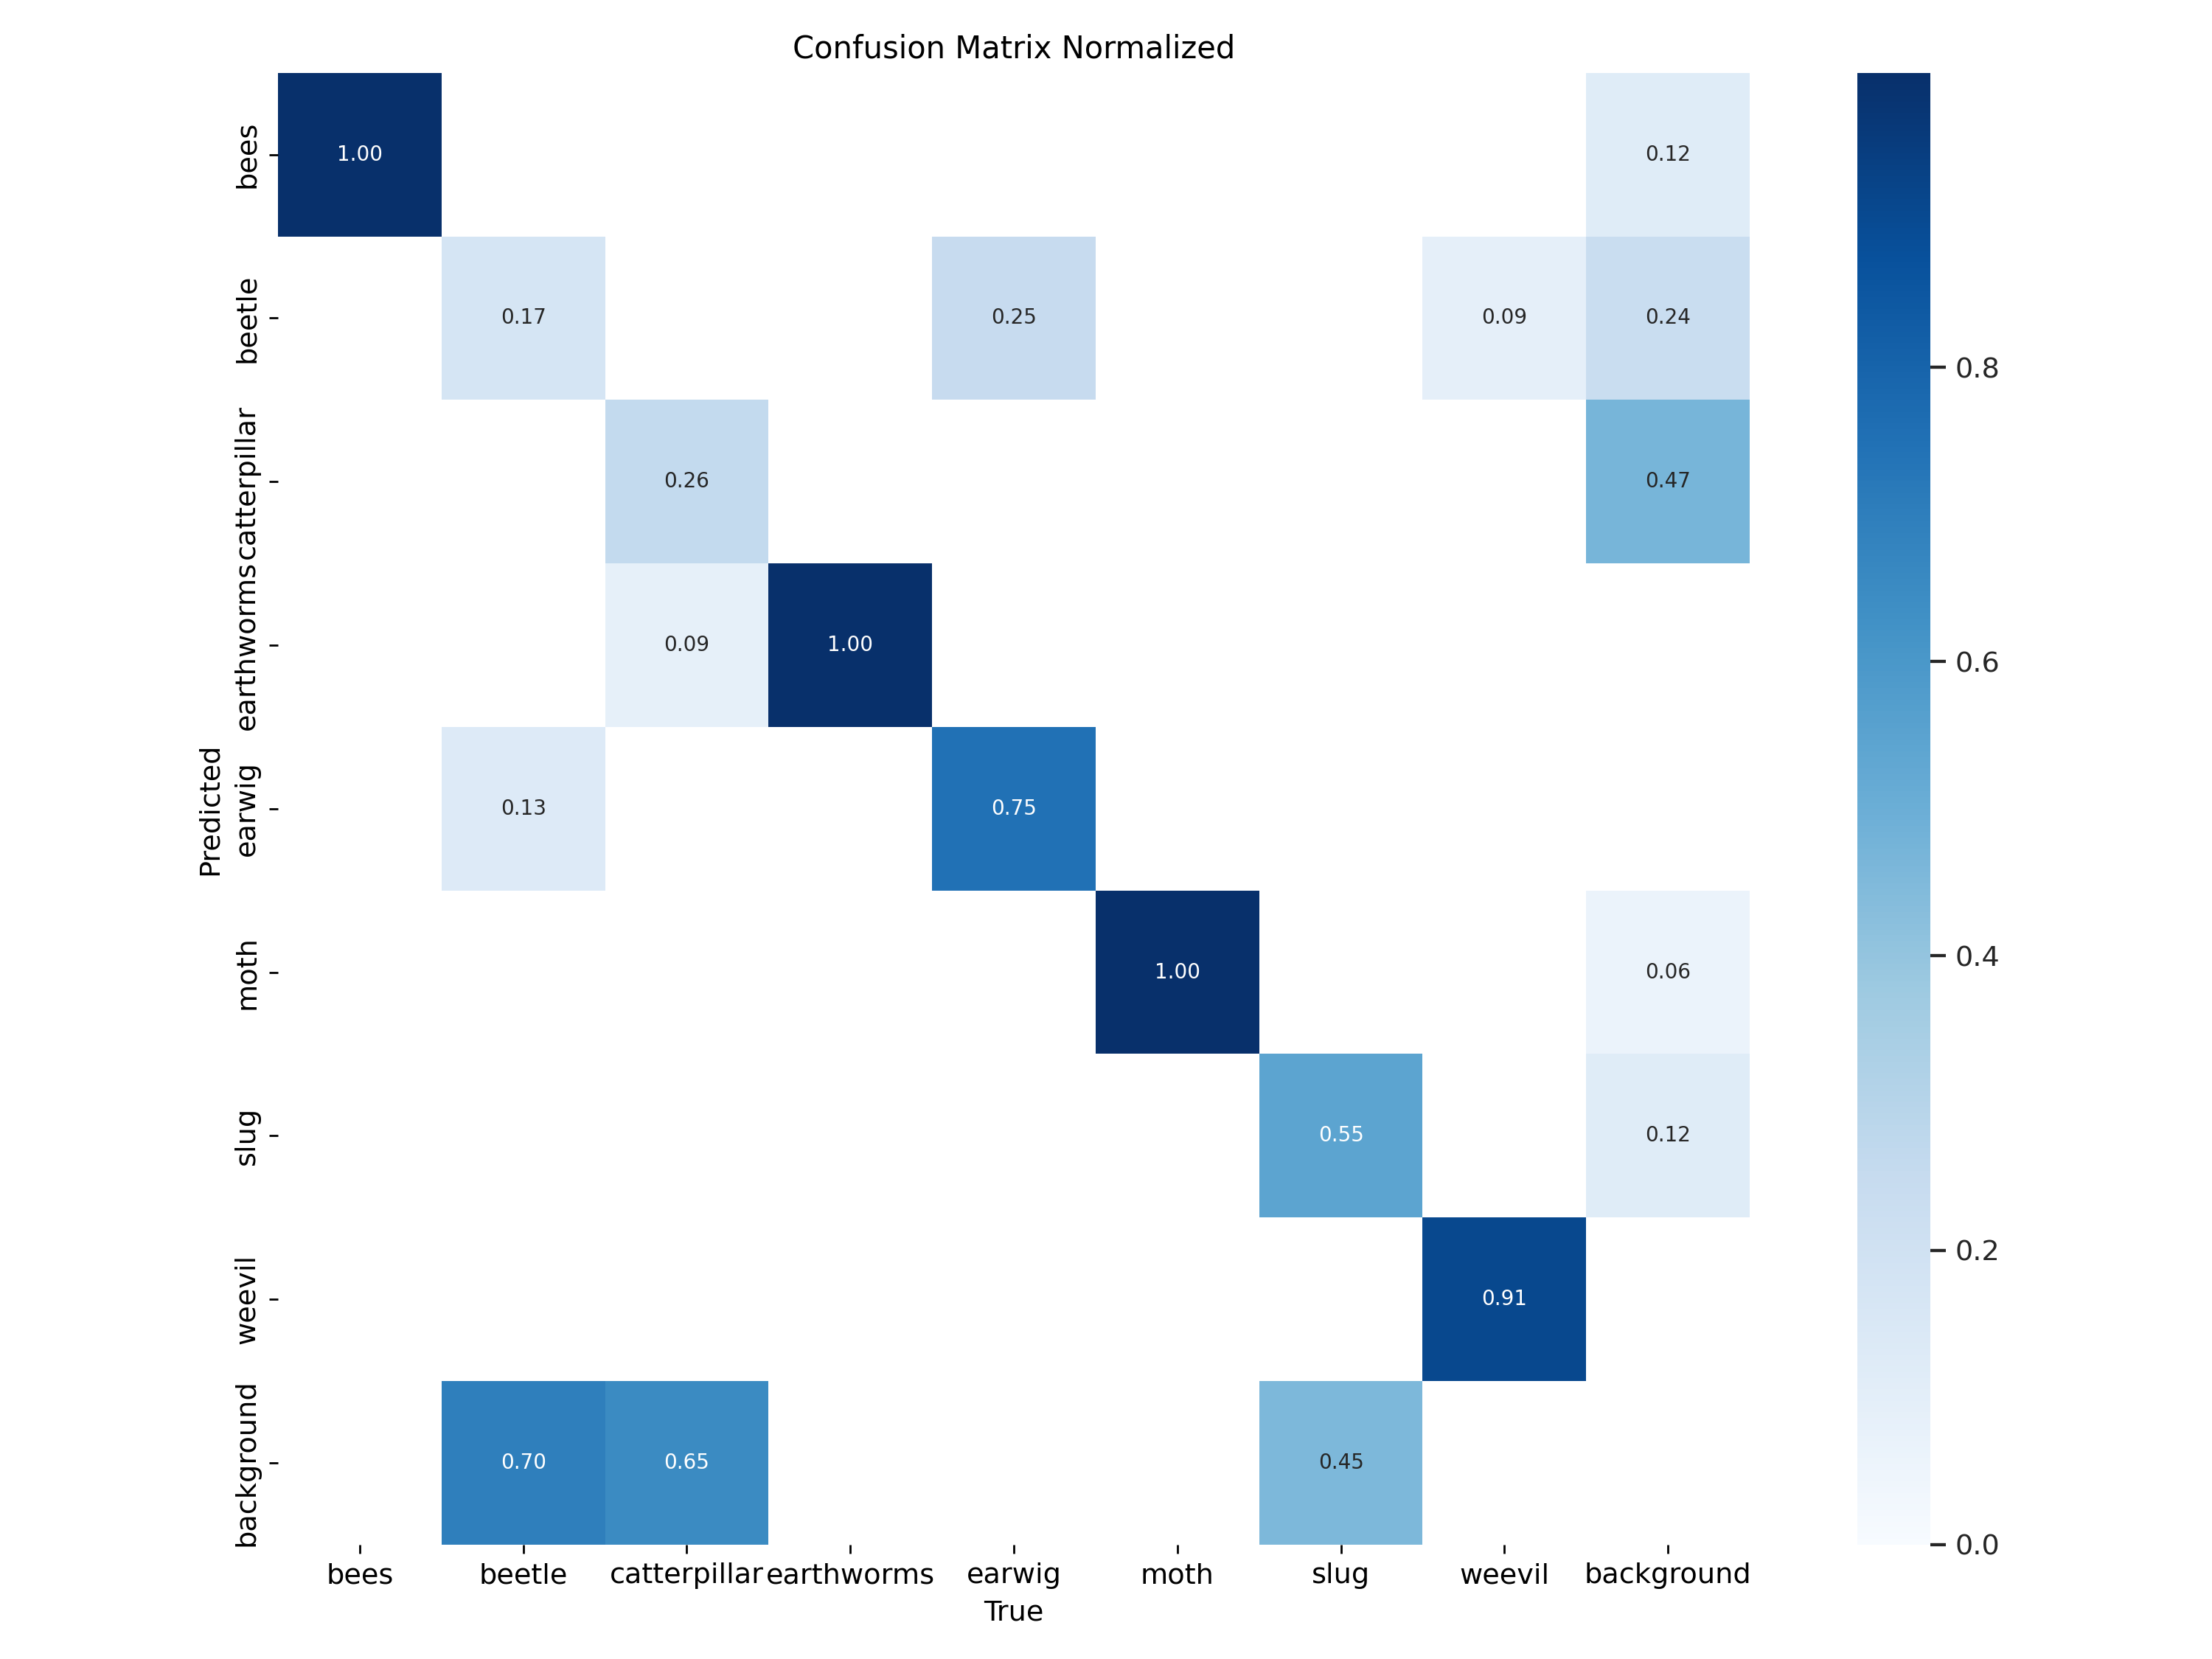

In [ ]:
from IPython.display import Image, display

confusion_matrix_path = "/content/runs/detect/train2/confusion_matrix_normalized.png"
display(Image(filename=confusion_matrix_path, height=400))


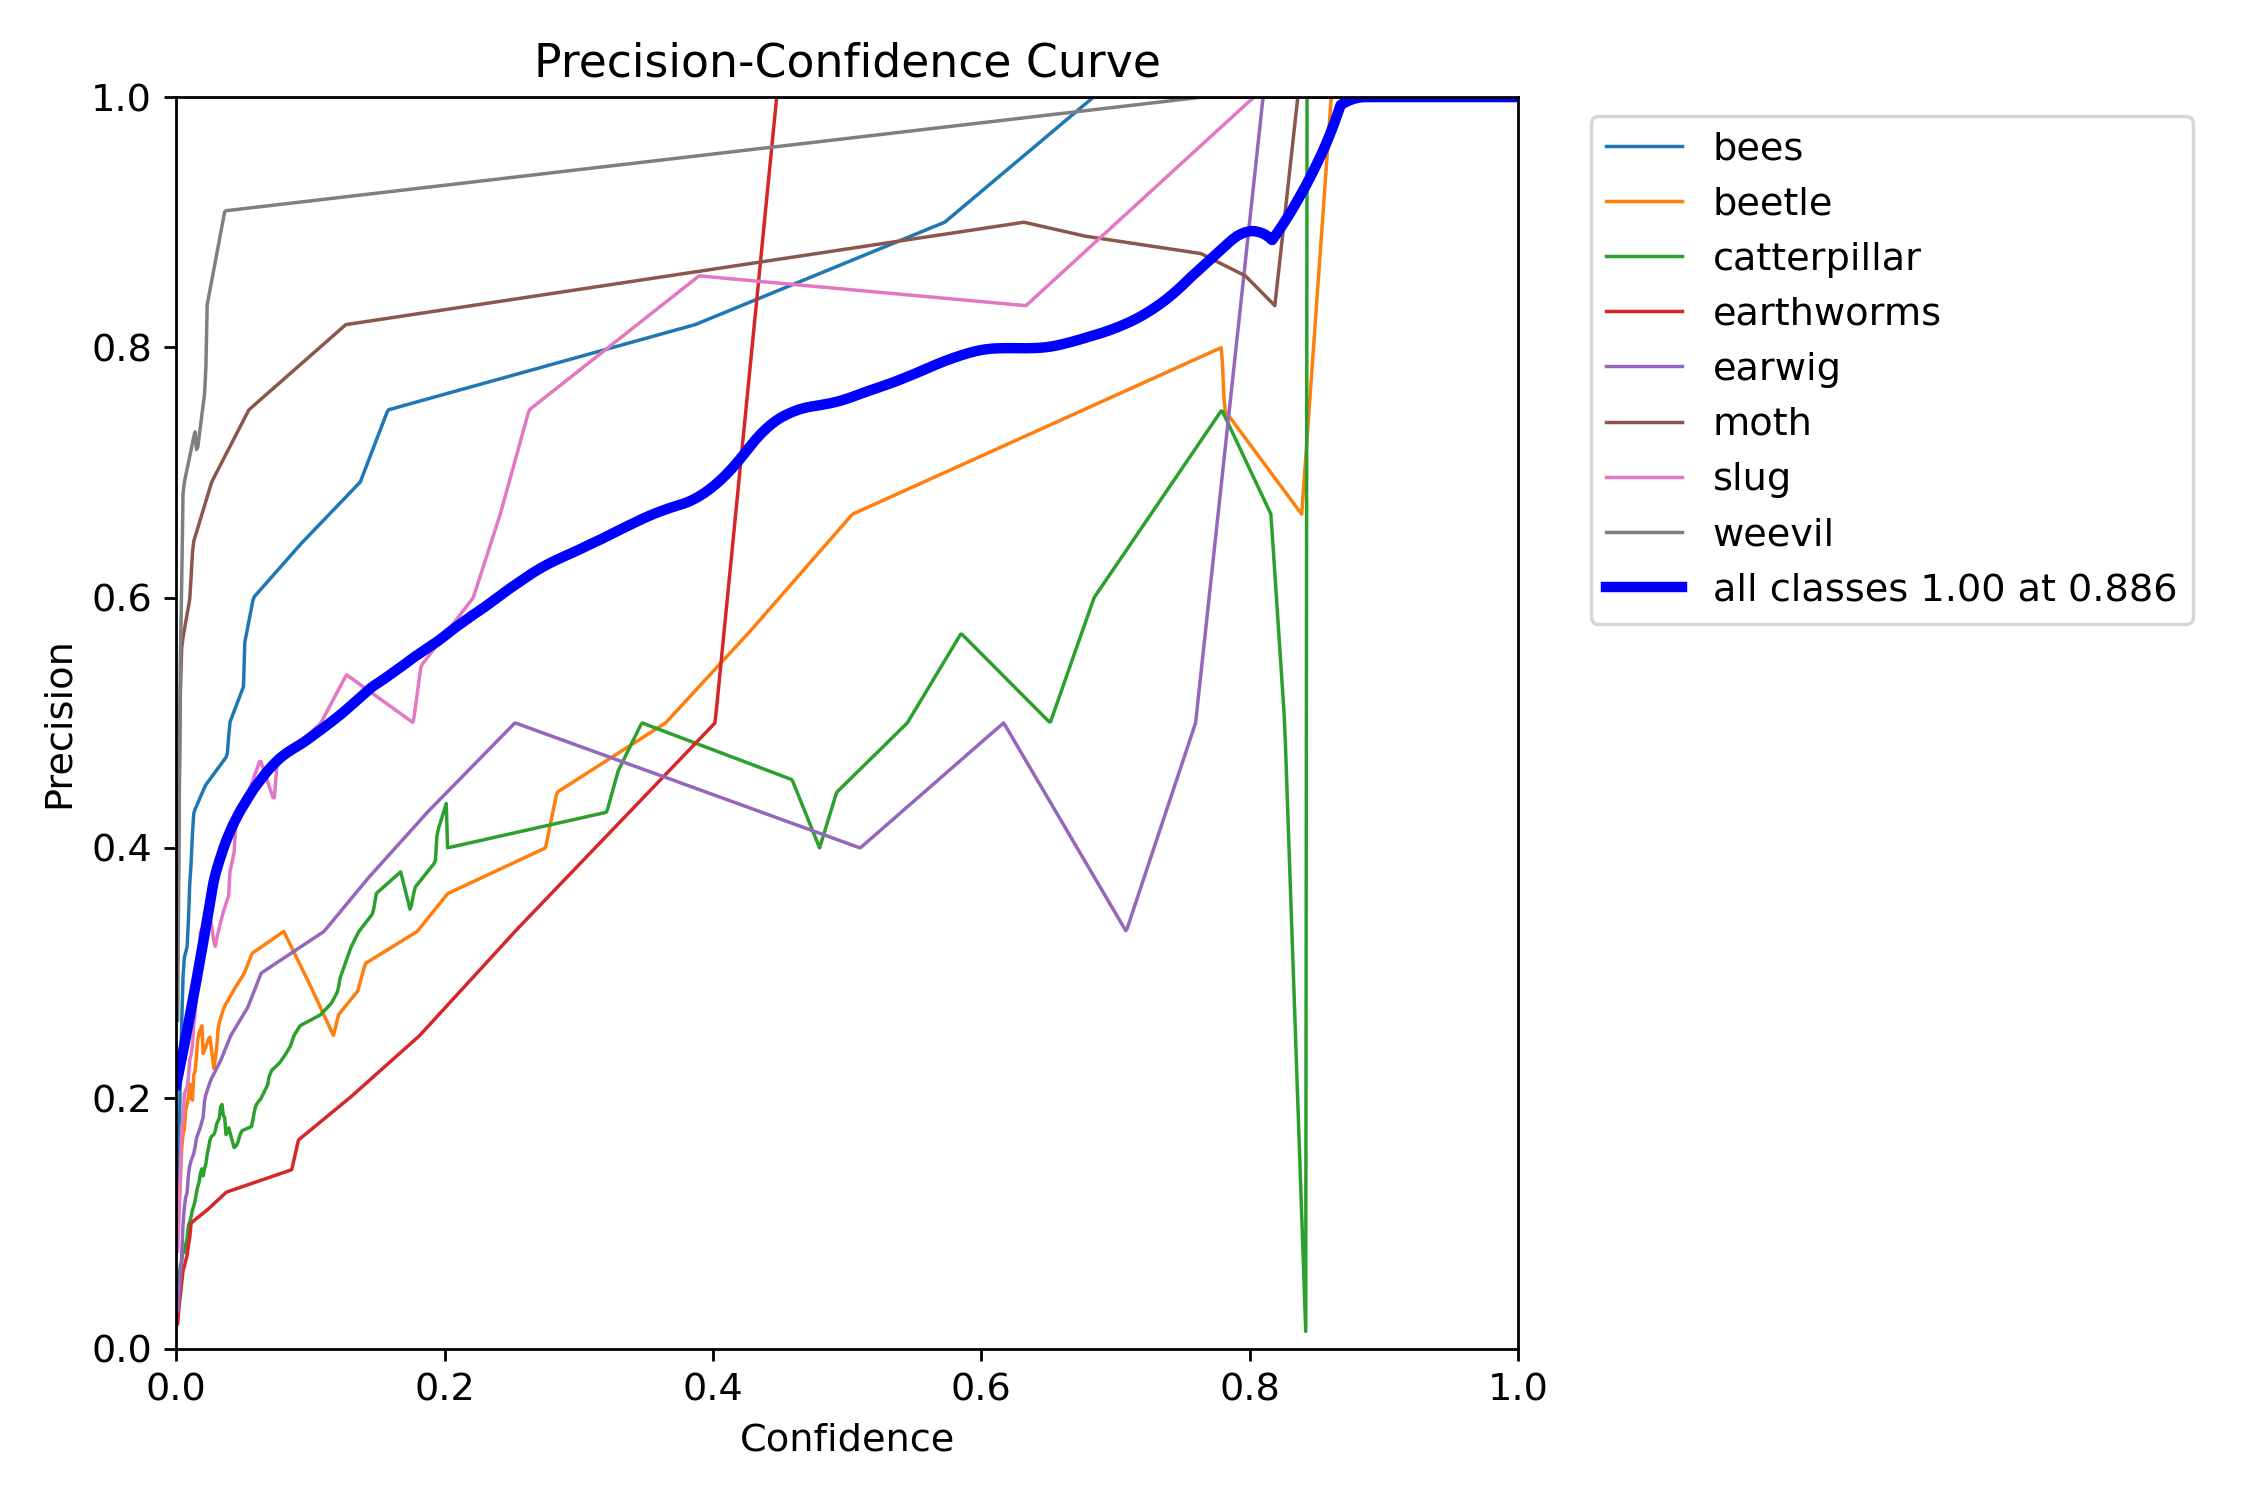

In [ ]:
from IPython.display import Image, display

confusion_matrix_path = "/content/runs/detect/train2/P_curve.png"
display(Image(filename=confusion_matrix_path, height=400))


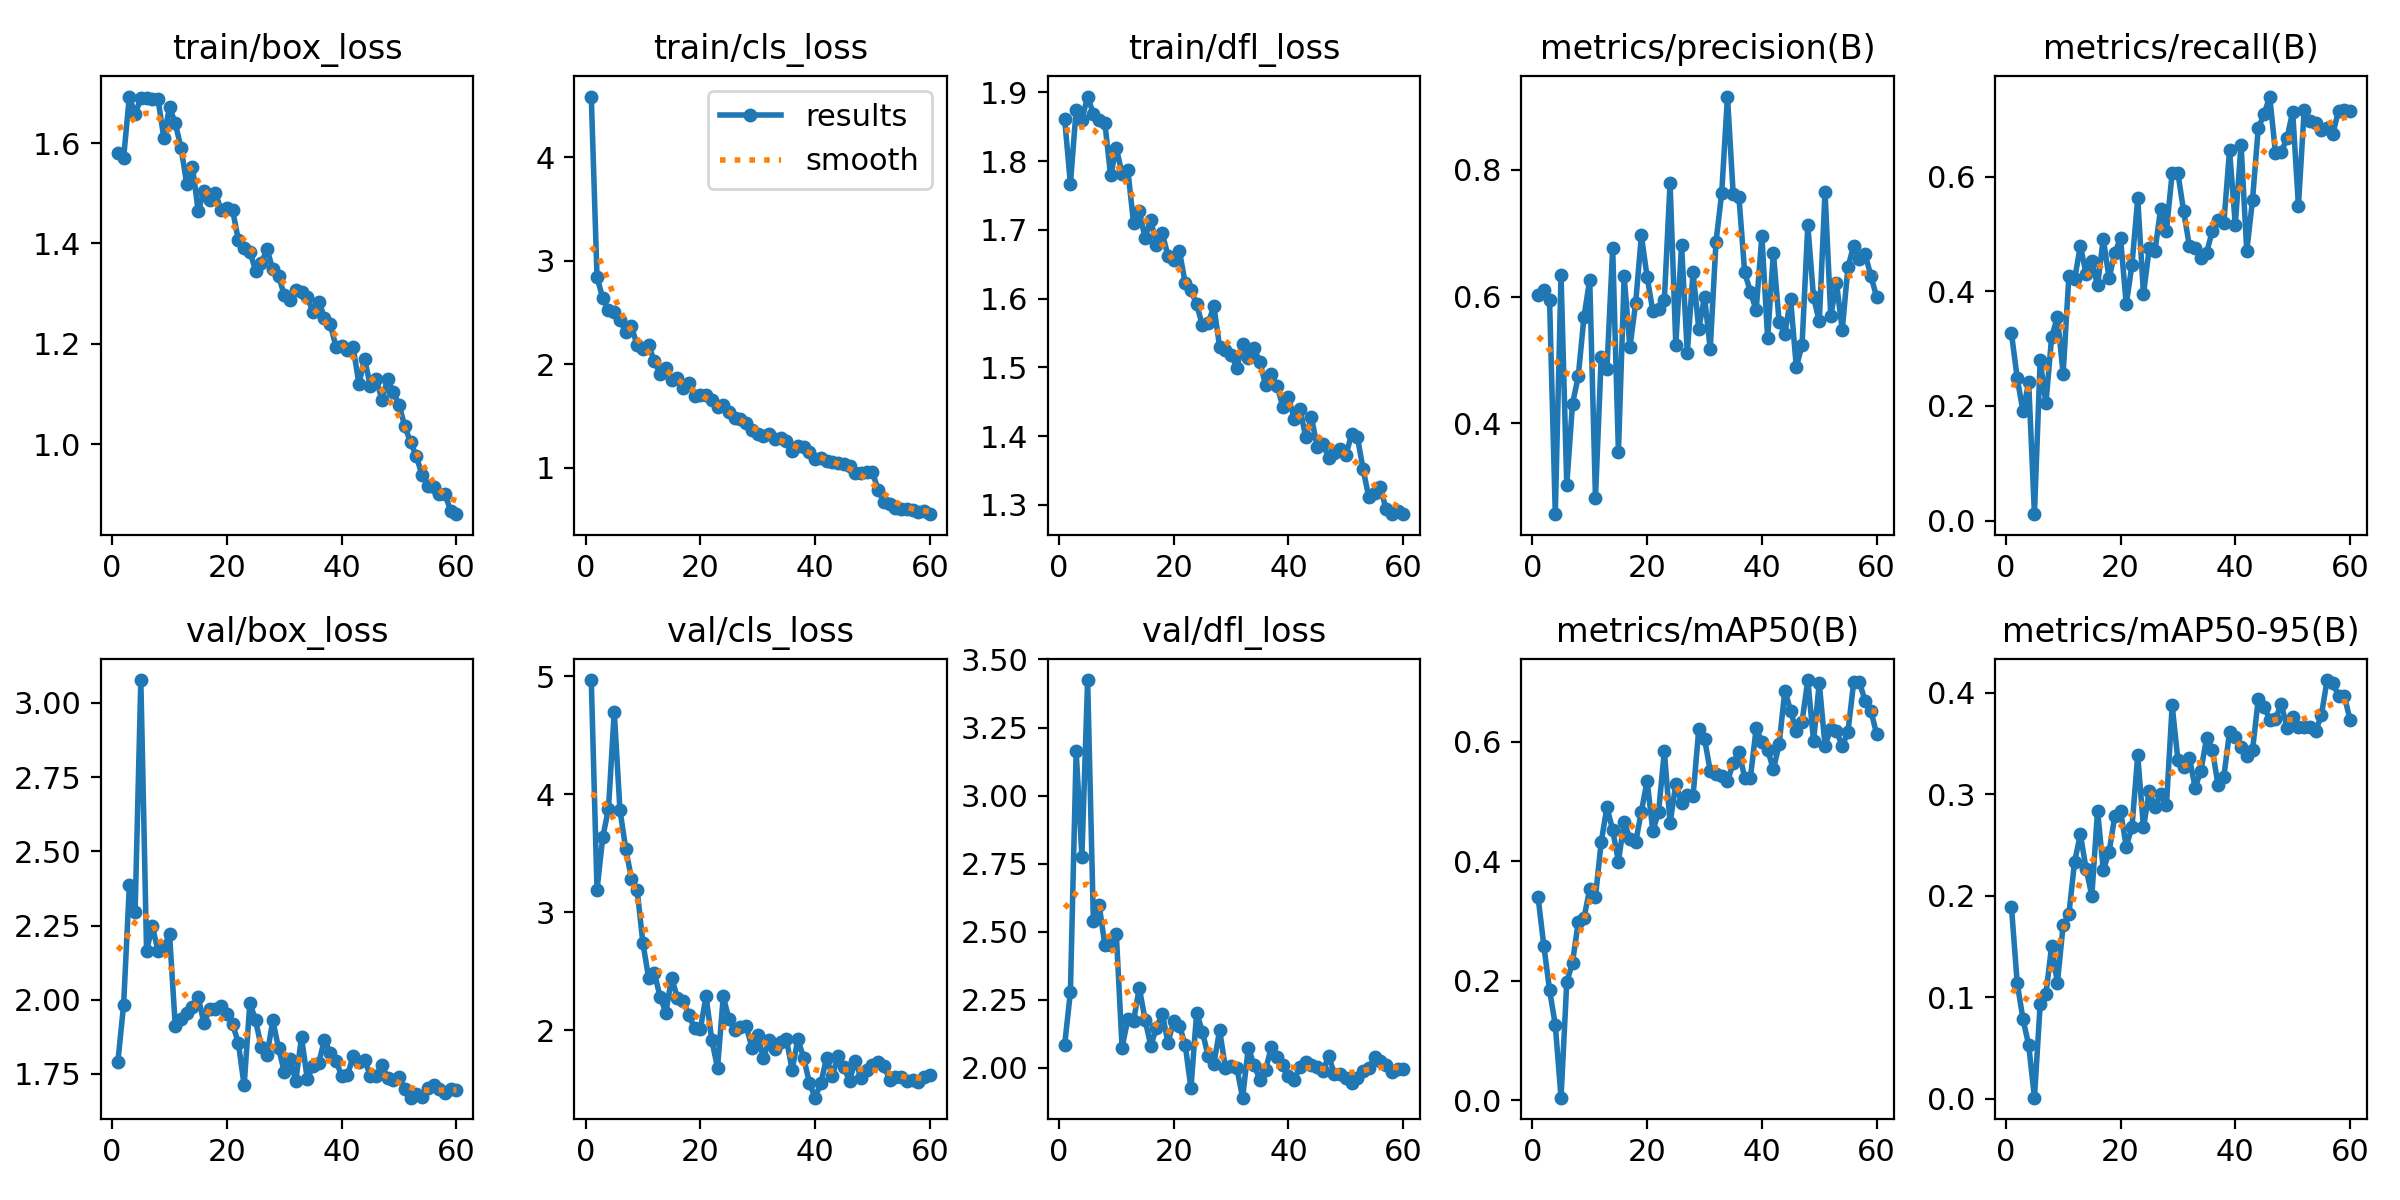

In [ ]:
from IPython.display import Image, display

confusion_matrix_path = "/content/runs/detect/train2/results.png"
display(Image(filename=confusion_matrix_path, height=400))

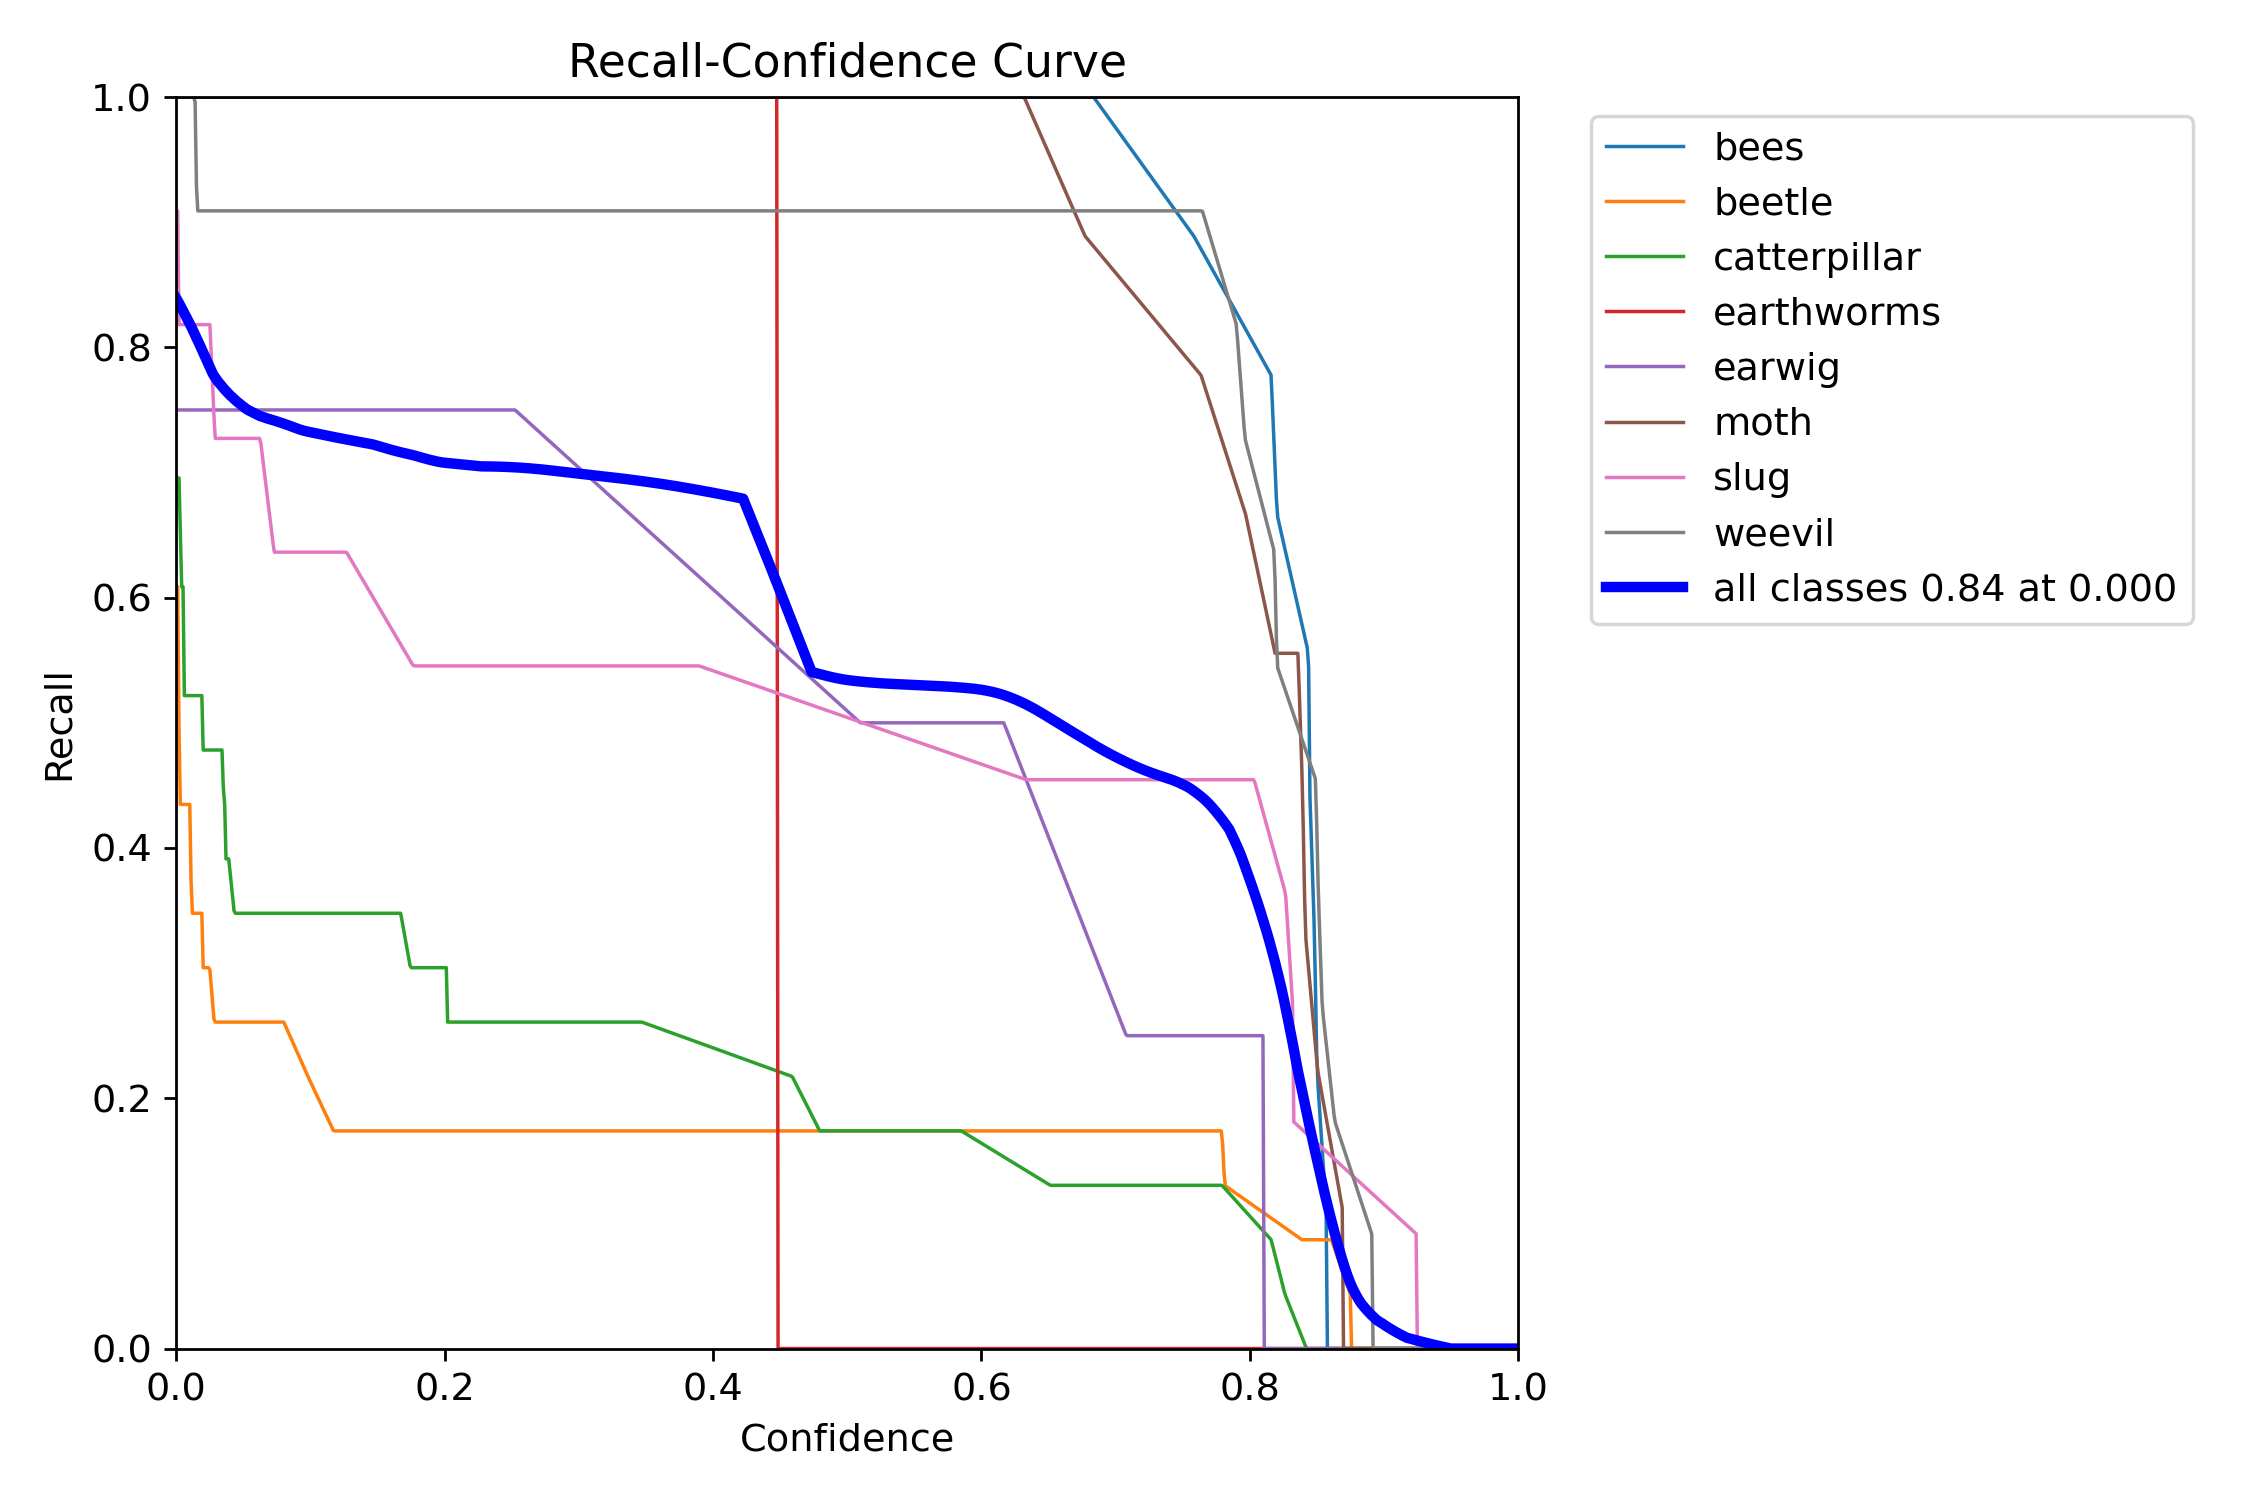

In [ ]:
from IPython.display import Image, display

confusion_matrix_path = "/content/runs/detect/train2/R_curve.png"
display(Image(filename=confusion_matrix_path, height=400))

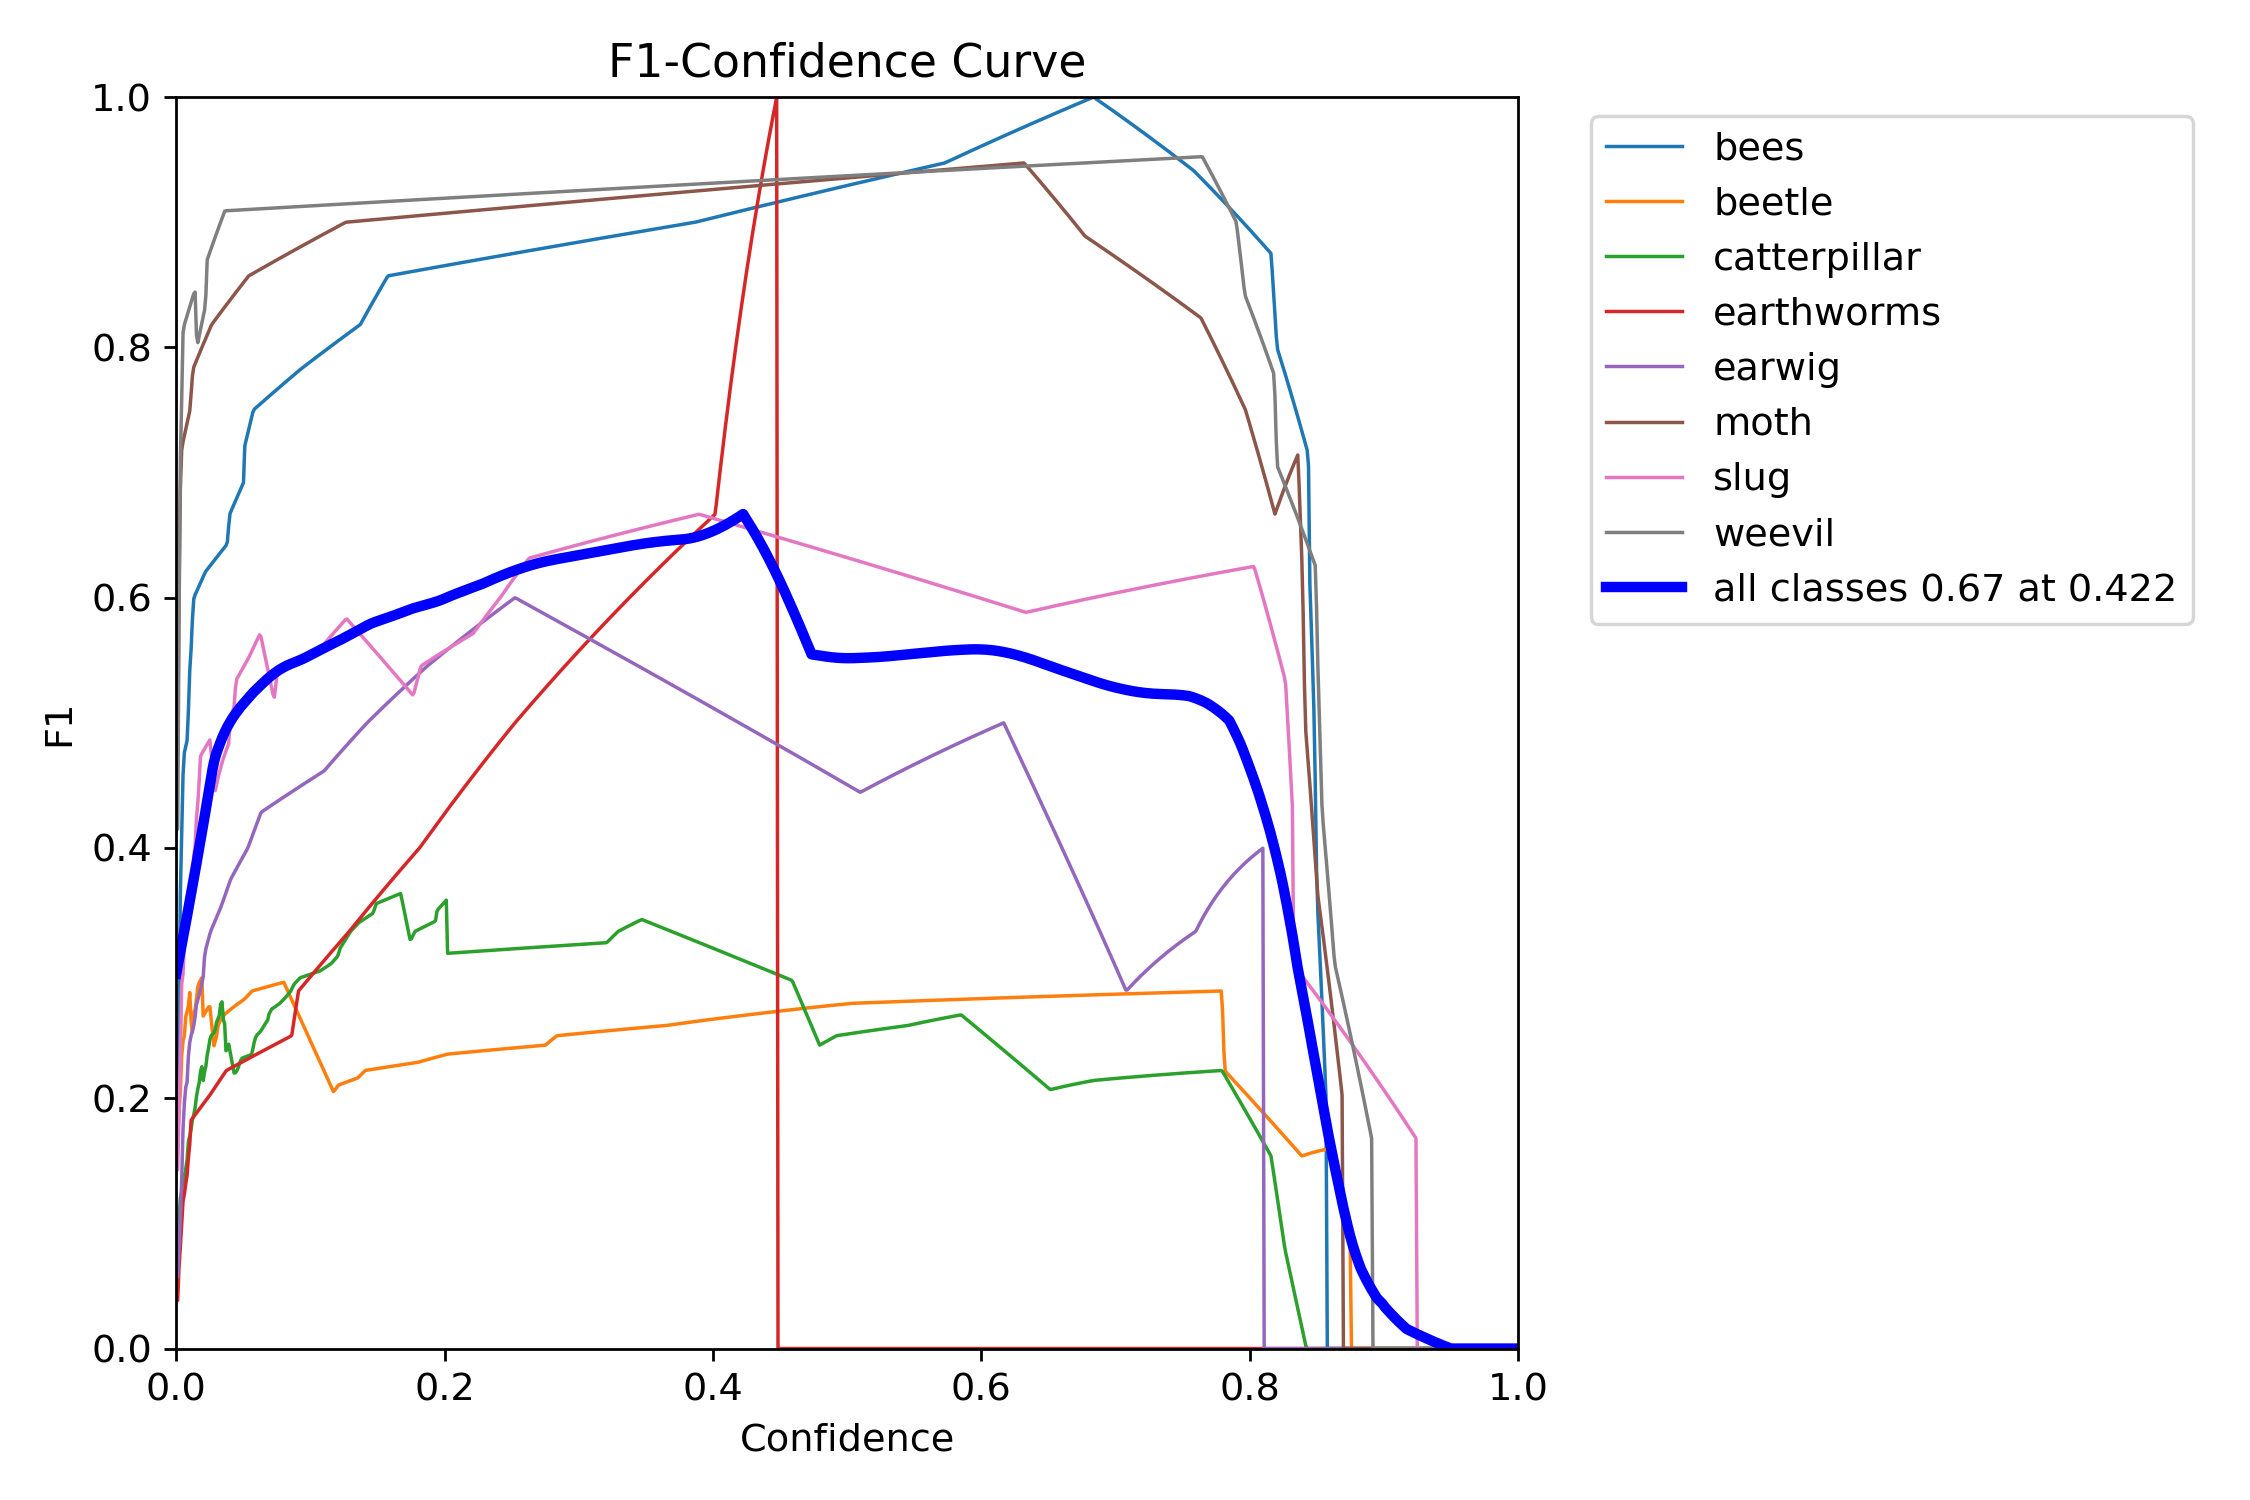

In [ ]:
from IPython.display import Image, display

confusion_matrix_path = "/content/runs/detect/train2/F1_curve.png"
display(Image(filename=confusion_matrix_path, height=400))

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train2/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
  adding: my_model.pt (deflated 8%)
updating: train/ (stored 0%)
updating: train/weights/ (stored 0%)
updating: train/args.yaml (deflated 53%)
/content


📤 Upload an image for testing:


Saving DALL·E 2025-03-01 16.54.23 - A realistic, detailed image of a moth resting on a tree bark. The moth has large, textured wings with intricate patterns and earthy brown and gray ton.webp to DALL·E 2025-03-01 16.54.23 - A realistic, detailed image of a moth resting on a tree bark. The moth has large, textured wings with intricate patterns and earthy brown and gray ton (1).webp

image 1/1 /content/DALL·E 2025-03-01 16.54.23 - A realistic, detailed image of a moth resting on a tree bark. The moth has large, textured wings with intricate patterns and earthy brown and gray ton (1).webp: 640x640 2 catterpillars, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


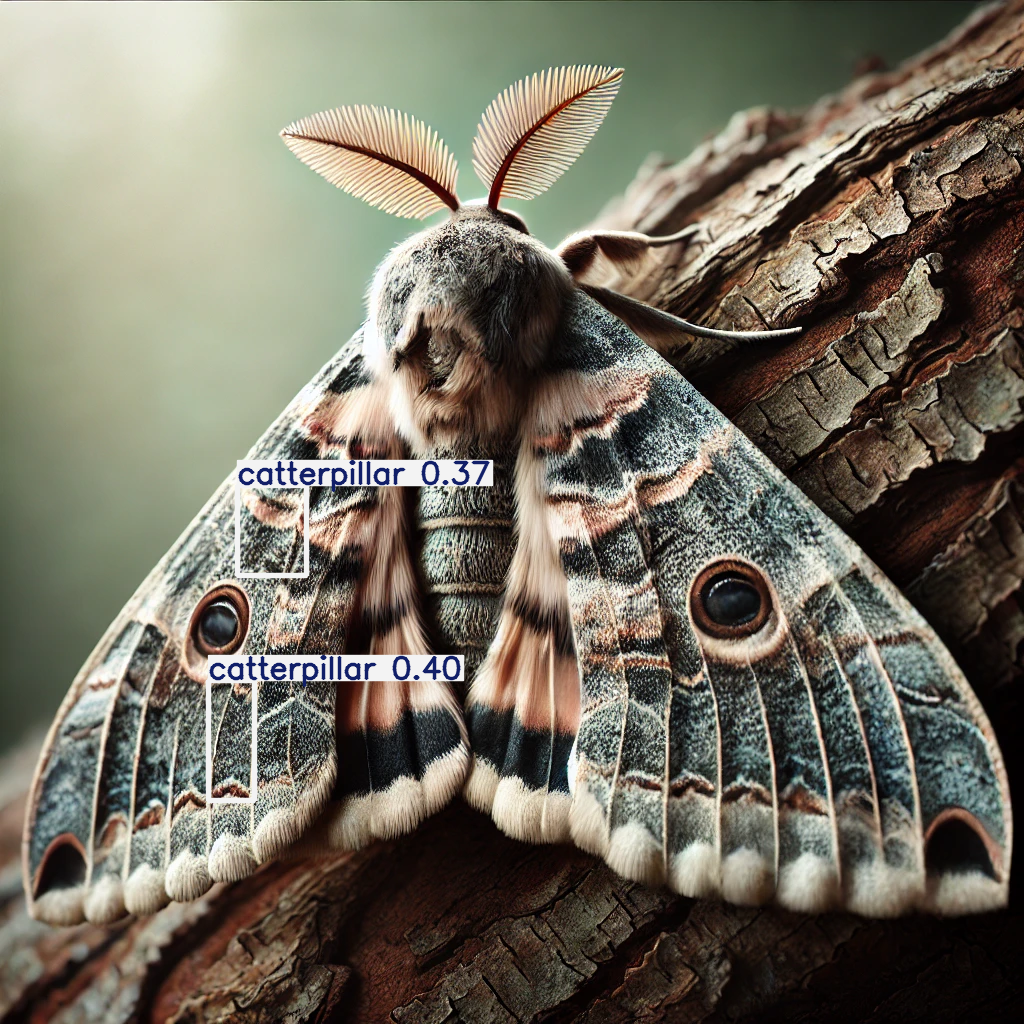

📊 Detection Results:
Class: catterpillar, Confidence: 0.40
Class: catterpillar, Confidence: 0.37


In [ ]:
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained YOLOv8 model
model = YOLO("/content/my_model/my_model.pt")  # Update path if needed

# Upload Image
print("📤 Upload an image for testing:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Perform inference
results = model(image_path)

# Show image with bounding boxes
results[0].show()

# Save results
results[0].save(filename="/content/detection_results.jpg")

# Print detected classes and confidence scores
print("📊 Detection Results:")
for r in results:
    for box in r.boxes:
        class_id = int(box.cls.item())  # Convert tensor to integer
        confidence = float(box.conf.item())  # Convert tensor to float
        print(f"Class: {model.names[class_id]}, Confidence: {confidence:.2f}")


In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>